IMPORT DATA

In [1]:
import pandas as pd
import numpy as np

In [2]:
path='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv'
df = pd.read_csv(path)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


ANALYZING INDIVIDUAL FEATURES

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
print(df.dtypes)

symboling              int64
normalized-losses      int64
make                  object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
city-L/100km         float64
horsepower-binned     object
diesel                 int64
gas                    int64
dtype: object


## 1. Find the correlation between the following columns: bore, stroke, compression-ratio, and horsepower.

In [5]:
df_corr=df[['bore','stroke','compression-ratio','horsepower']]
df_corr

,bore,stroke,compression-ratio,horsepower
0,3.47,2.68,9.0,111.0
1,3.47,2.68,9.0,111.0
2,2.68,3.47,9.0,154.0
3,3.19,3.40,10.0,102.0
4,3.19,3.40,8.0,115.0
...,...,...,...,...
196,3.78,3.15,9.5,114.0
197,3.78,3.15,8.7,160.0
198,3.58,2.87,8.8,134.0
199,3.01,3.40,23.0,106.0


In [6]:
df_corr.corr()

,bore,stroke,compression-ratio,horsepower
bore,1.000000,-0.055390,0.001263,0.566936
stroke,-0.055390,1.000000,0.187923,0.098462
compression-ratio,0.001263,0.187923,1.000000,-0.214514
horsepower,0.566936,0.098462,-0.214514,1.000000


## 2. Find the scatterplot of "engine-size" and "price".
Positive Linear Relationship

(0.0, 53132.65727003235)

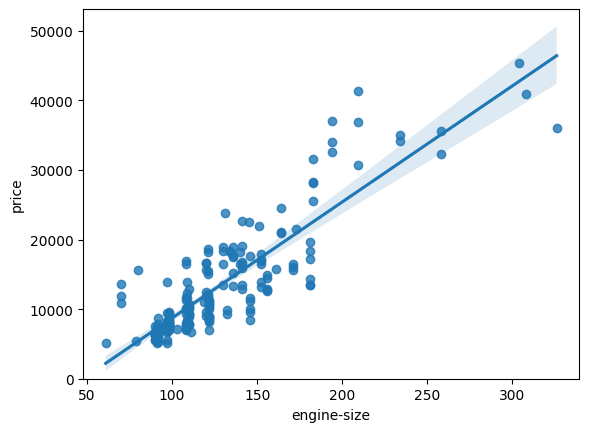

In [7]:
sns.regplot(data = df, x= 'engine-size', y='price')
plt.ylim(0,)

As the engine-size goes up, the price goes up: this indicates a positive direct correlation between these two variables. Engine size seems like a pretty good predictor of price since the regression line is almost a perfect diagonal line.

We can examine the correlation between 'engine-size' and 'price' and see that it's approximately 0.87 which confirms that their correlation is high.

In [8]:
df[['engine-size','price']].corr()

,engine-size,price
engine-size,1.000000,0.872335
price,0.872335,1.000000


## 3. Highway mpg is a potential predictor variable of price. Let's find the scatterplot of "highway-mpg" and "price".

(0.0, 48168.81586504155)

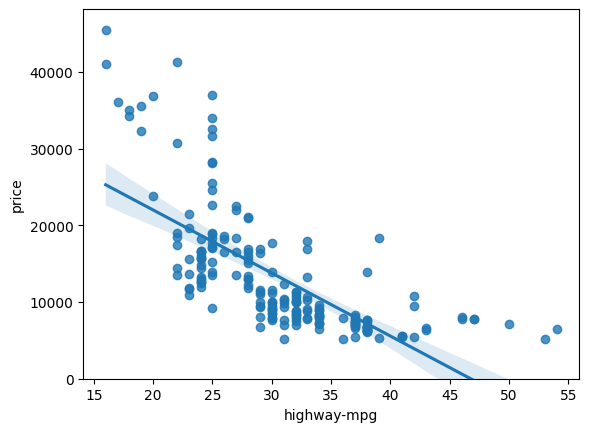

In [9]:
sns.regplot(data= df, x='highway-mpg', y='price')
plt.ylim(0,)

As highway-mpg goes up, the price goes down: this indicates an inverse/negative relationship between these two variables. Highway mpg could potentially be a predictor of price.

We can examine the correlation between 'highway-mpg' and 'price' and see it's approximately -0.704.

In [10]:
df[['highway-mpg','price']].corr()

,highway-mpg,price
highway-mpg,1.000000,-0.704692
price,-0.704692,1.000000


## 4. Let's see if "peak-rpm" is a predictor variable of "price".



(0.0, 47414.1)

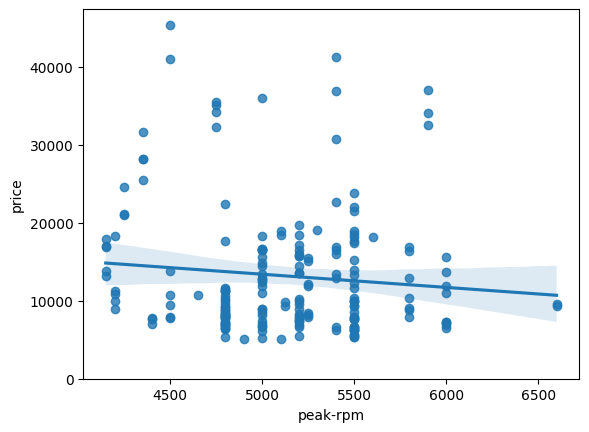

In [11]:
sns.regplot(data=df, x='peak-rpm', y='price')
plt.ylim(0,)

Peak rpm does not seem like a good predictor of the price at all since the regression line is close to horizontal. Also, the data points are very scattered and far from the fitted line, showing lots of variability. Therefore, it's not a reliable variable.

This feature might not be suitable for predicting the price. Let's confirm it by examining the correlation.

In [12]:
df[['peak-rpm','price']].corr()

,peak-rpm,price
peak-rpm,1.000000,-0.101616
price,-0.101616,1.000000


The correlation is almost 0, telling that there is not a relevant correlation between peak-rpm and price.

## 5. Find the correlation between x="stroke" and y="price".

In [13]:
df[['stroke', 'price']].corr()

,stroke,price
stroke,1.00000,0.08231
price,0.08231,1.00000


There is a weak correlation between the variable 'stroke' and 'price.' as such regression will not work well. We can see this using "regplot" to demonstrate this.

<Axes: xlabel='price', ylabel='stroke'>

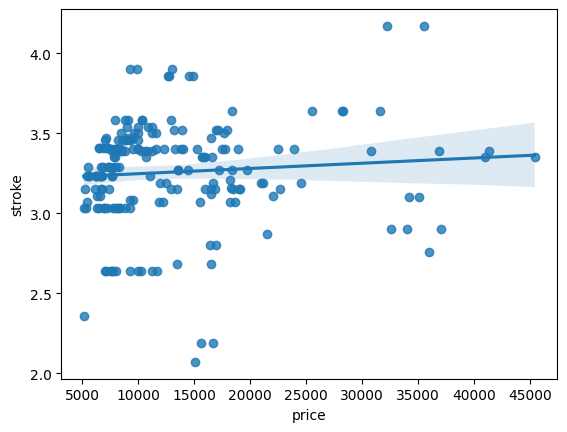

In [14]:
sns.regplot(data=df, x='price', y='stroke')

## 6. Look at the relationship between "body-style" and "price".

Since they are categorical variables, we can use boxplot.

<Axes: xlabel='body-style', ylabel='price'>

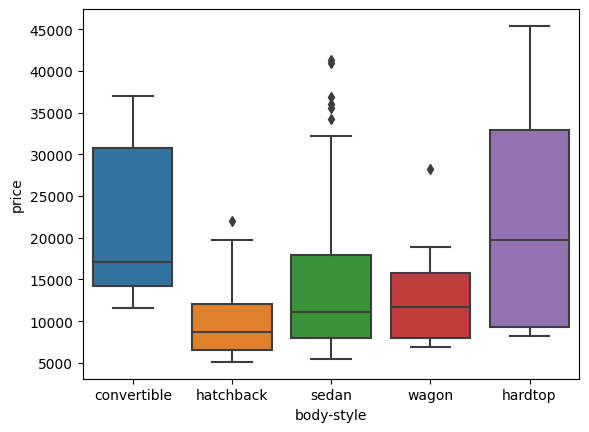

In [15]:
sns.boxplot(data=df, x= 'body-style', y ='price')

We see that the distributions of price between the different body-style categories have a significant overlap, so body-style would not be a good predictor of price.

Let's examine engine "engine-location" and "price":

<Axes: xlabel='engine-location', ylabel='price'>

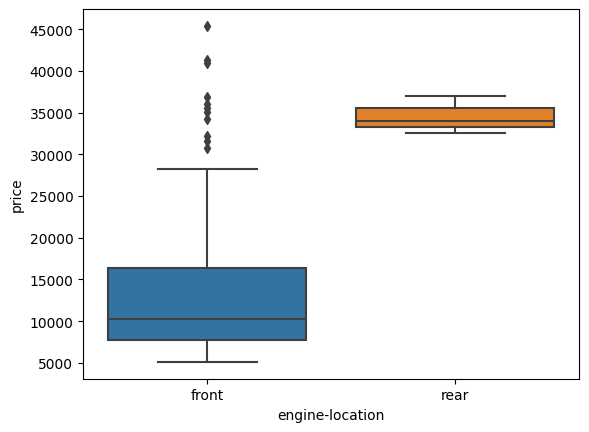

In [16]:
sns.boxplot(data = df, x='engine-location', y='price')

Here we see that the distribution of price between these two engine-location categories, front and rear, are distinct enough to take engine-location as a potential good predictor of price.

Let's examine "drive-wheels" and "price".

<Axes: xlabel='drive-wheels', ylabel='price'>

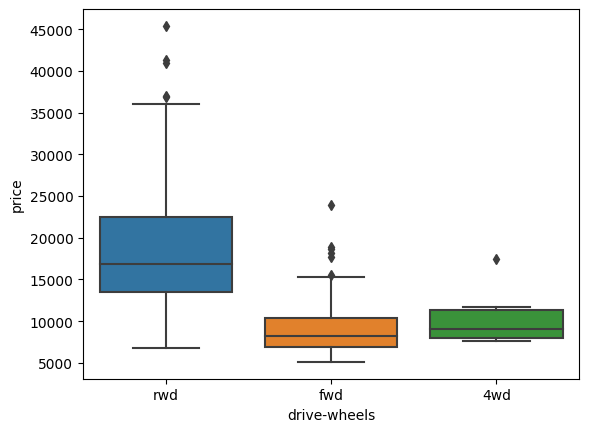

In [17]:
sns.boxplot(data=df, x='drive-wheels', y= 'price')

Here we see that the distribution of price between the different drive-wheels categories differs. As such, drive-wheels could potentially be a predictor of price.

## Analyzing the variables from a statistical method


## 7. Look at the variables by utilizing a description method.
Compute basic statistics for all continuous variables.

In [18]:
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,197.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,0.837102,0.915126,53.766667,2555.666667,126.875622,3.330692,3.256904,10.164279,103.405534,5117.665368,25.179104,30.686567,13207.129353,9.944145,0.099502,0.900498
std,1.254802,31.99625,6.066366,0.059213,0.029187,2.447822,517.296727,41.546834,0.268072,0.319256,4.004965,37.365700,478.113805,6.423220,6.815150,7947.066342,2.534599,0.300083,0.300083
min,-2.000000,65.00000,86.600000,0.678039,0.837500,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,4.795918,0.000000,0.000000
25%,0.000000,101.00000,94.500000,0.801538,0.890278,52.000000,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000,7.833333,0.000000,1.000000
50%,1.000000,122.00000,97.000000,0.832292,0.909722,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5125.369458,24.000000,30.000000,10295.000000,9.791667,0.000000,1.000000
75%,2.000000,137.00000,102.400000,0.881788,0.925000,55.500000,2926.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000,12.368421,0.000000,1.000000
max,3.000000,256.00000,120.900000,1.000000,1.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000,18.076923,1.000000,1.000000


## 8. Understand how many units of each characteristic/variable we have for 'drive-wheels'

In [19]:
df['drive-wheels'].value_counts()

fwd    118
rwd     75
4wd      8
Name: drive-wheels, dtype: int64

Let's change it to a data frame

In [20]:
df['drive-wheels'].value_counts().to_frame()

,drive-wheels
fwd,118
rwd,75
4wd,8


In [21]:
drive_wheels_counts = df['drive-wheels'].value_counts().to_frame()

In [22]:
drive_wheels_counts.rename(columns={'drive-wheels':'value_counts'}, inplace= True)

In [23]:
drive_wheels_counts

,value_counts
fwd,118
rwd,75
4wd,8


In [24]:
drive_wheels_counts.index.name = 'drive-wheels'

In [25]:
drive_wheels_counts

,value_counts
drive-wheels,
fwd,118
rwd,75
4wd,8


## 9. Understand how many units of each characteristic/variable we have for 'engine-location'

In [26]:
engine_location = df['engine-location'].value_counts().to_frame()
engine_location.rename(columns={'engine-location':'value_counts'}, inplace = True)
engine_location.index.name='engine_location'
engine_location

,value_counts
engine_location,
front,198
rear,3


After examining the value counts of the engine location, we see that engine location would not be a good predictor variable for the price. This is because we only have three cars with a rear engine and 198 with an engine in the front, so this result is skewed. Thus, we are not able to draw any conclusions about the engine location.

## 10. See that there are 3 different categories of drive wheels.

In [27]:
df['drive-wheels'].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

## 11.Which type of drive wheel is most valuable?

In [28]:
df.groupby(df['drive-wheels']).agg({'price':'mean'}).sort_values(by='price', ascending=False)

,price
drive-wheels,
rwd,19757.613333
4wd,10241.000000
fwd,9244.779661


From our data, it seems rear-wheel drive vehicles are, on average, the most expensive, while 4-wheel and front-wheel are approximately the same in price.

## 12.Group by both 'drive-wheels' and 'body-style'. Include price in the analysis.

In [29]:
wheels_body_price = df[['drive-wheels','body-style','price']]

In [30]:
group_wh_bo_pr = wheels_body_price.groupby(['drive-wheels','body-style'],as_index=False).agg({'price':'mean'})

In [31]:
group_wh_bo_pr

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


In [32]:
group_wh_bo_pr_1 = group_wh_bo_pr.pivot(index='drive-wheels', columns='body-style')

In [33]:
group_wh_bo_pr_1

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  NaN           NaN   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

In [34]:
group_wh_bo_pr_1 = group_wh_bo_pr_1.fillna(0)

In [35]:
group_wh_bo_pr_1

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  0.0      0.000000   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

## 13. Use the "groupby" function to find the average "price" of each car based on "body-style".

In [36]:
body_price = df.groupby('body-style', as_index =False).agg({'price':'mean'})
body_price

,body-style,price
0,convertible,21890.500000
1,hardtop,22208.500000
2,hatchback,9957.441176
3,sedan,14459.755319
4,wagon,12371.960000


## 14. Use a heat map to visualize the relationship between Body Style vs Price.

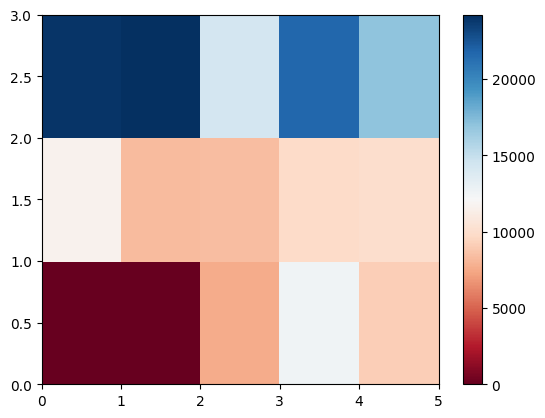

In [37]:
plt.pcolor(group_wh_bo_pr_1, cmap= 'RdBu')
plt.colorbar()
plt.show()

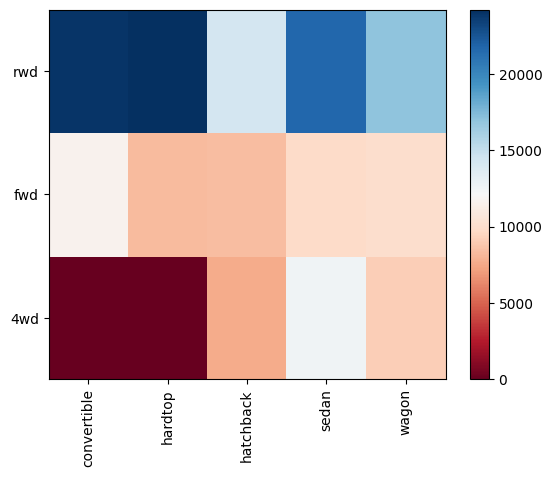

In [38]:
fig, ax = plt.subplots()
im = ax.pcolor(group_wh_bo_pr_1, cmap='RdBu')

#label names
row_labels = group_wh_bo_pr_1.columns.levels[1]
col_labels = group_wh_bo_pr_1.index

#move ticks and labels to the center
ax.set_xticks(np.arange(group_wh_bo_pr_1.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(group_wh_bo_pr_1.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

## Correlation

## How significant are the correlations?

For reference:

The P-value is the probability value that the correlation between these two variables is statistically significant. Normally, we choose a significance level of 0.05, which means that we are 95% confident that the correlation between the variables is significant.

By convention, when the p-value is < 0.001: we say there is strong evidence that the correlation is significant.

the p-value is < 0.05: there is moderate evidence that the correlation is significant.

the p-value is < 0.1: there is weak evidence that the correlation is significant.

the p-value is > 0.1: there is no evidence that the correlation is significant.



## 15. Calculate the Pearson Correlation Coefficient and P-value of 'wheel-base' and 'price'.

In [39]:
from scipy import stats

In [40]:
pearson_coef, p_value = stats.pearsonr(df['wheel-base'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.584641822265508  with a P-value of P = 8.076488270732885e-20


Since the p-value is $<$ 0.001, the correlation between wheel-base and price is statistically significant, although the linear relationship is not extremely strong (~0.585).

## 16. Calculate the Pearson Correlation Coefficient and P-value of 'horsepower' and 'price'.

In [41]:
pearson_coef, p_value = stats.pearsonr(df['length'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)

The Pearson Correlation Coefficient is 0.6906283804483638  with a P-value of P =  8.016477466159723e-30


Since the p-value is < 0.001, the correlation between length and price is statistically significant, and the linear relationship is moderately strong (~0.691).

## 17. Calculate the Pearson Correlation Coefficient and P-value of 'width' and 'price'.

In [42]:
pearson_coef, p_value = stats.pearsonr(df['width'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value )

The Pearson Correlation Coefficient is 0.7512653440522673  with a P-value of P = 9.20033551048206e-38


Since the p-value is < 0.001, the correlation between width and price is statistically significant, and the linear relationship is quite strong (~0.751).

## 18. Calculate the Pearson Correlation Coefficient and P-value of 'curb-weight' and 'price'

In [43]:
pearson_coef, p_value = stats.pearsonr(df['curb-weight'], df['price'])
print( "The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)

The Pearson Correlation Coefficient is 0.8344145257702843  with a P-value of P =  2.189577238893965e-53


Since the p-value is < 0.001, the correlation between curb-weight and price is statistically significant, and the linear relationship is quite strong (~0.834).

##19. Calculate the Pearson Correlation Coefficient and P-value of 'engine-size' and 'price':

In [44]:
pearson_coef, p_value = stats.pearsonr(df['engine-size'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.8723351674455185  with a P-value of P = 9.265491622198793e-64


Since the p-value is < 0.001, the correlation between engine-size and price is statistically significant, and the linear relationship is very strong (~0.872).

## 20. Calculate the Pearson Correlation Coefficient and P-value of 'bore' and 'price'.

In [45]:
pearson_coef, p_value = stats.pearsonr(df['bore'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =  ", p_value )

The Pearson Correlation Coefficient is 0.5431553832626602  with a P-value of P =   8.049189483935315e-17


Since the p-value is < 0.001, the correlation between bore and price is statistically significant, but the linear relationship is only moderate (~0.521).

## 21. Calculate the Pearson Correlation Coefficient and P-value of 'city-mpg' and 'highway-mpg'

In [46]:
pearson_coef, p_value = stats.pearsonr(df['city-mpg'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)

The Pearson Correlation Coefficient is -0.6865710067844678  with a P-value of P =  2.3211320655675098e-29


Since the p-value is < 0.001, the correlation between city-mpg and price is statistically significant, and the coefficient of about -0.687 shows that the relationship is negative and moderately strong.


## 22. Calculate the Pearson Correlation Coefficient and P-value of 'Highway-mpg' and 'Price'

In [47]:
pearson_coef, p_value = stats.pearsonr(df['highway-mpg'], df['price'])
print( "The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value )

The Pearson Correlation Coefficient is -0.704692265058953  with a P-value of P =  1.749547114447557e-31


Since the p-value is < 0.001, the correlation between highway-mpg and price is statistically significant, and the coefficient of about -0.705 shows that the relationship is negative and moderately strong.

## Conclusion

The main variables for creating a model are:

Continuous numerical variables:
<ul>
    <li>Length</li>
    <li>Width</li>
    <li>Curb-weight</li>
    <li>Engine-size</li>
    <li>Horsepower</li>
    <li>City-mpg</li>
    <li>Highway-mpg</li>
    <li>Wheel-base</li>
    <li>Bore</li>
</ul>
    
Categorical variables:
<ul>
    <li>Drive-wheels</li>

These variables will give value to the model, allowing to obtain meaningful predictions.

## MODEL DEVELOPMENT

Develop prediction models.
Predict the price of the car using the variables or features

<h2>1. Linear Regression and Multiple Linear Regression</h2>

Simple Linear Regression which produces a linear function.

In [48]:
from sklearn.linear_model import LinearRegression

In [49]:
#create the linear regression object
lm = LinearRegression()

In [50]:
lm

LinearRegression()

How could "highway-mpg" help us predict car price?

In [51]:
X = df[['highway-mpg']]
Y = df['price']

In [52]:
lm.fit(X,Y)

LinearRegression()

In [53]:
Yhat = lm.predict(X)
Yhat[0:5]

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ,
       20345.17153508])

In [54]:
#value of the intercept
lm.intercept_

38423.3058581574

In [55]:
#value of the slope
lm.coef_

array([-821.73337832])

In [56]:
#Final linear model structure
print(f'Price = {lm.intercept_} + {lm.coef_} *highway-mpg')

Price = 38423.3058581574 + [-821.73337832] *highway-mpg


How could "engine-size" help us predict car price?

In [57]:
lm1 = LinearRegression()
lm1

LinearRegression()

In [58]:
X1=df[['engine-size']]
Y1=df[['price']]


In [59]:
lm1.fit(X1,Y1)

LinearRegression()

In [60]:
Yhat1=lm1.predict(X1)
Yhat[0:5]

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ,
       20345.17153508])

In [61]:
lm1.intercept_

array([-7963.33890628])

In [62]:
lm1.coef_

array([[166.86001569]])

In [63]:
#Final linear model structure
print(f'Price = {lm1.intercept_} + {lm1.coef_} *engine-size')

Price = [-7963.33890628] + [[166.86001569]] *engine-size


Multiple Linear Regression

In [64]:
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]

In [65]:
lm2=LinearRegression()

In [66]:
lm2.fit(Z,df[['price']])

LinearRegression()

In [67]:
lm2.intercept_

array([-15806.62462633])

In [68]:
coef=lm2.coef_

In [69]:
coef=coef.flatten()

In [70]:
import array
arr = array.array("f", coef)
lst = [x for x in arr]
print(type(lst)) # <class 'list'>
print(lst)

<class 'list'>
[53.49574279785156, 4.707701206207275, 81.53026580810547, 36.05748748779297]


In [71]:
arr[0]

53.49574279785156

In [72]:
Z.columns[0]

'horsepower'

In [73]:
#Final linear model structure
print(f'Price = {lm2.intercept_} + {arr[0]} * {Z.columns[0]} + {arr[1]}*{Z.columns[1]} + {arr[2]}*{Z.columns[2]} + {arr[3]}*{Z.columns[3]}')

Price = [-15806.62462633] + 53.49574279785156 * horsepower + 4.707701206207275*curb-weight + 81.53026580810547*engine-size + 36.05748748779297*highway-mpg


In [74]:
#Multiple Linear Regression model "lm3" where the response variable is "price", and the predictor variable is "normalized-losses" and "highway-mpg".
lm3=LinearRegression()


In [75]:
Z3=df[['normalized-losses','highway-mpg']]
Y3=df['price']

In [76]:
lm3.fit(Z3,Y3)

LinearRegression()

In [77]:
lm3.intercept_

38201.31327245728

In [78]:
coef=lm3.coef_

In [79]:
coef3=coef.flatten()

In [80]:
coef3[0]

1.4978958634133213

In [81]:
#Final linear model structure
print(f'Price = {lm3.intercept_} + {coef3[0]} * {Z3.columns[0]} + {coef3[1]}*{Z3.columns[1]}')

Price = 38201.31327245728 + 1.4978958634133213 * normalized-losses + -820.4543401631865*highway-mpg


## Model evaluation using visualization

Regression plot

(0.0, 48169.40275166504)

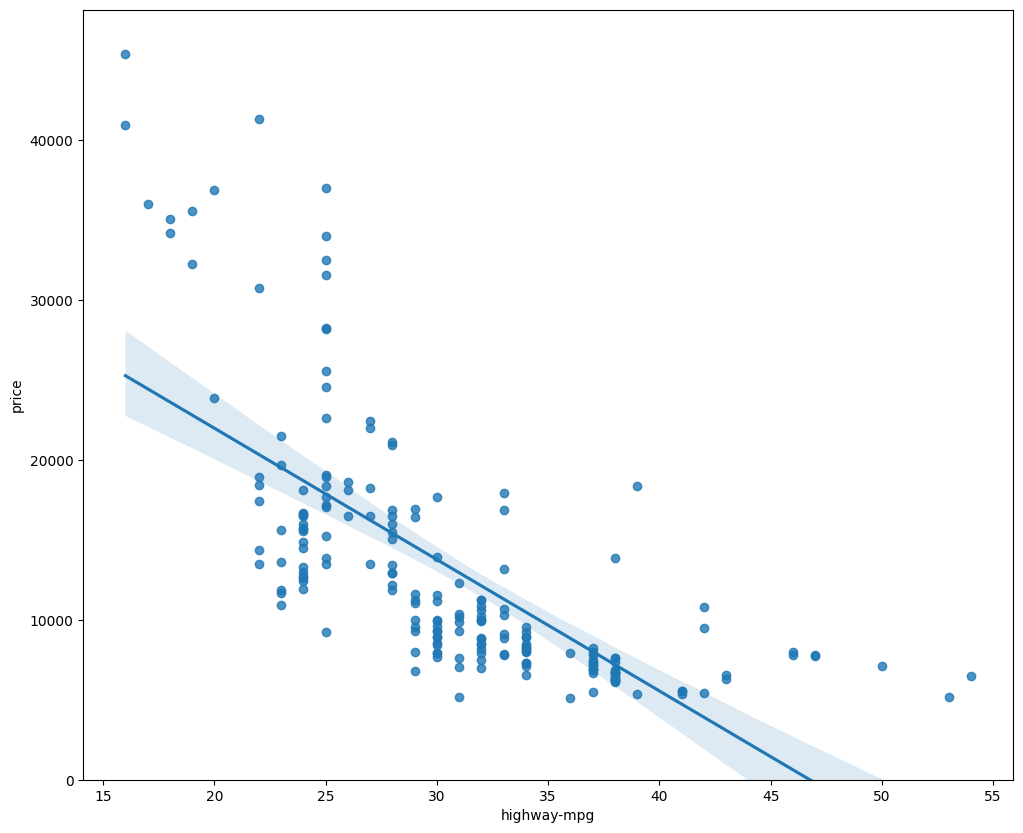

In [82]:
width=12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x='highway-mpg', y='price', data=df)
plt.ylim(0,)

We can see from this plot that price is negatively correlated to highway-mpg since the regression slope is negative.

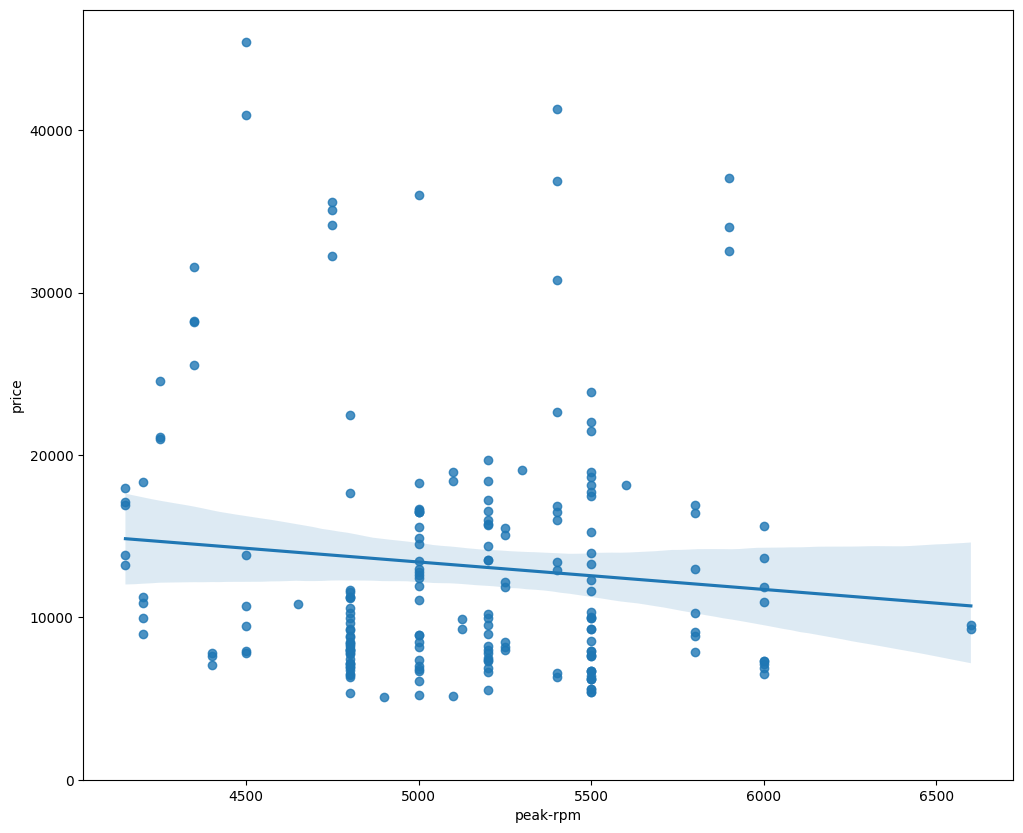

In [83]:
#Regression plot of "peak-rpm".
plt.figure(figsize=(width, height))
sns.regplot(data=df, x='peak-rpm', y='price' )
plt.ylim(0,)
plt.show()

The points for "peak-rpm" have more spread around the predicted line and it is much harder to determine if the points are decreasing or increasing as the "peak-rpm" increases.

In [84]:
#Correlation among 'price','highway-mpg','peak-rpm'
df[['price','highway-mpg','peak-rpm']].corr()

,price,highway-mpg,peak-rpm
price,1.000000,-0.704692,-0.101616
highway-mpg,-0.704692,1.000000,-0.058598
peak-rpm,-0.101616,-0.058598,1.000000


The variable "highway-mpg" has a stronger correlation with "price", it is approximate -0.704692  compared to "peak-rpm" which is approximate -0.101616.

<h3>Residual Plot</h3>

A good way to visualize the variance of the data

What is a residual?

The difference between the observed value (y) and the predicted value (Yhat) is called the residual (e). When we look at a regression plot, the residual is the distance from the data point to the fitted regression line.

So what is a residual plot?

A residual plot is a graph that shows the residuals on the vertical y-axis and the independent variable on the horizontal x-axis.

What do we pay attention to when looking at a residual plot?

We look at the spread of the residuals:

- If the points in a residual plot are randomly spread out around the x-axis, then a linear model is appropriate for the data.

Why is that? Randomly spread out residuals means that the variance is constant, and thus the linear model is a good fit for this data.

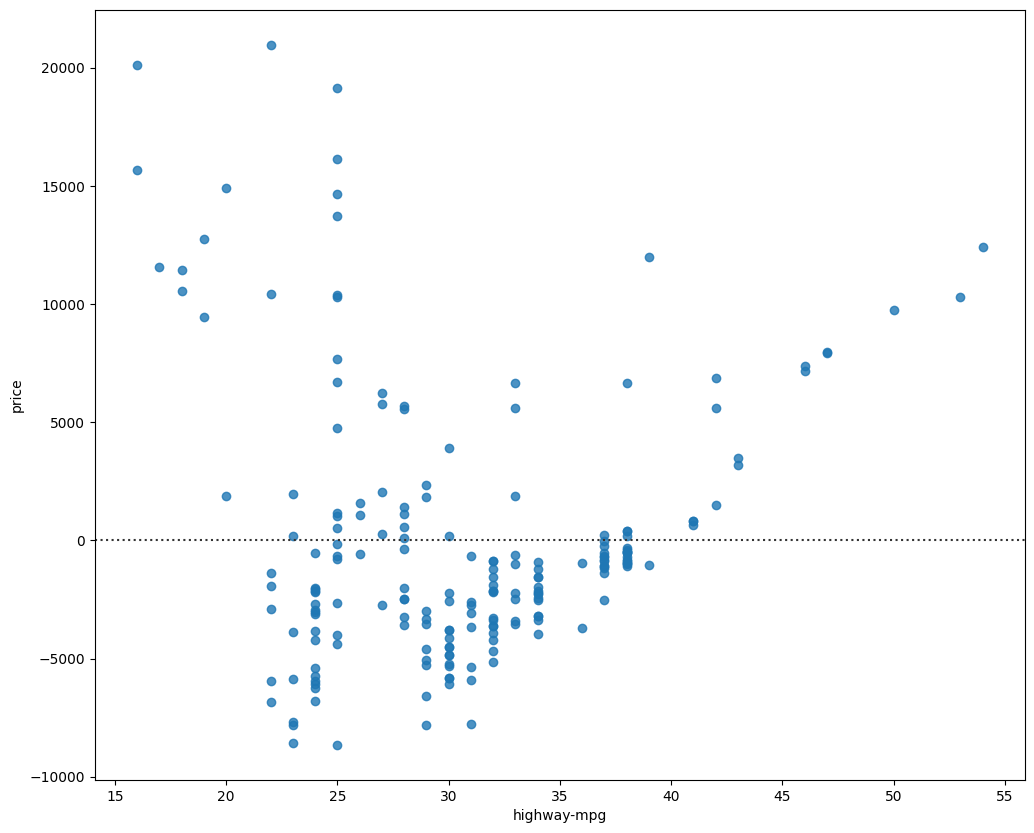

In [85]:
width = 12
height = 10

plt.figure(figsize=(width, height))
sns.residplot(x=df['highway-mpg'], y=df['price'])
plt.show()

We can see from this residual plot that the residuals are not randomly spread around the x-axis, leading us to believe that maybe a non-linear model is more appropriate for this data.

## Multiple Linear Regression

We use a distribution plot. We can look at the distribution of the fitted values that result from the model and compare it to the distribution of the actual values.

In [86]:
yhat = lm2.predict(Z)

<ipython-input-87-9dfb314bff92>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
<ipython-input-87-9dfb314bff92>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(yhat, hist=False, color="b", label="Fitted Values" ,

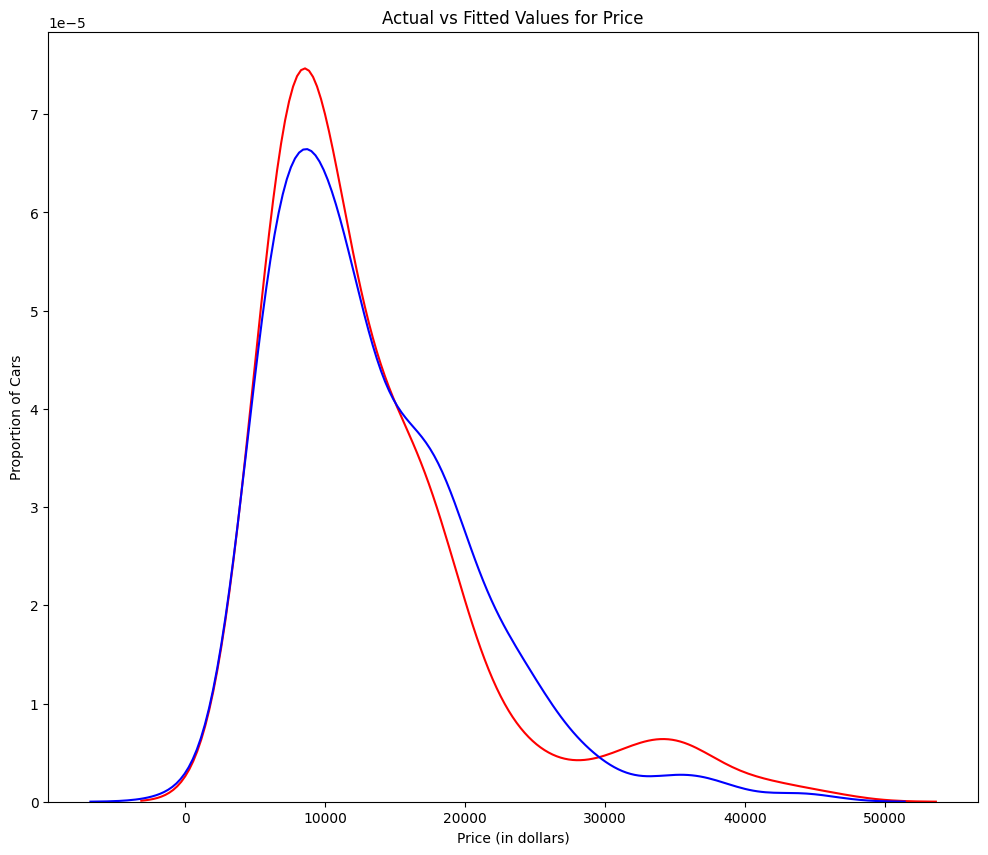

In [87]:
plt.figure(figsize=(width, height))


ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
sns.distplot(yhat, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

We can see that the fitted values are reasonably close to the actual values since the two distributions overlap a bit. However, there is definitely some room for improvement.

<h2>3. Polynomial Regression and Pipelines</h2>

Polynomial regression is a particular case of the general linear regression model or multiple linear regression models.

We get non-linear relationships by squaring or setting higher-order terms of the predictor variables.

In [88]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()

In [89]:
x = df['highway-mpg']
y = df['price']

In [90]:
# Here we use a polynomial of the 3rd order (cubic)
f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


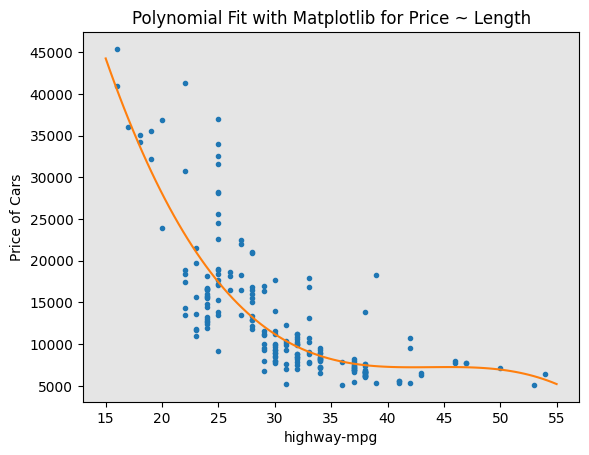

In [91]:
PlotPolly(p, x, y, 'highway-mpg')

In [92]:
np.polyfit(x,y,3)

array([-1.55663829e+00,  2.04754306e+02, -8.96543312e+03,  1.37923594e+05])

We can already see from plotting that this polynomial model performs better than the linear model. This is because the generated polynomial function "hits" more of the data points.


            11             10             9           8         7
-1.243e-08 x  + 4.722e-06 x  - 0.0008028 x + 0.08056 x - 5.297 x
          6        5             4             3             2
 + 239.5 x - 7588 x + 1.684e+05 x - 2.565e+06 x + 2.551e+07 x - 1.491e+08 x + 3.879e+08


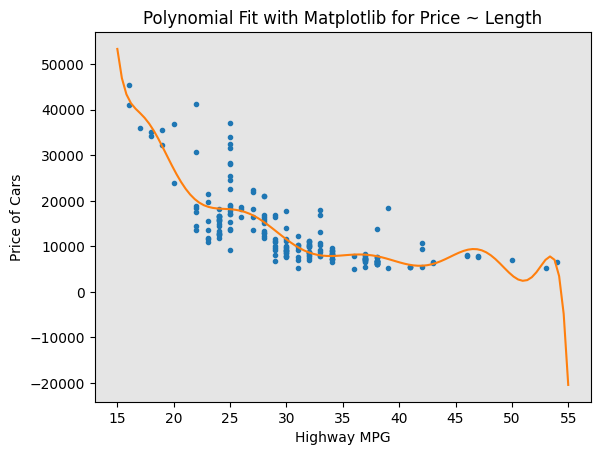

In [93]:
# Here we use a polynomial of the 11rd order (cubic)
f1 = np.polyfit(x, y, 11)
p1 = np.poly1d(f1)
print(p1)
PlotPolly(p1, x, y, 'Highway MPG')

In [94]:
# Perform a polynomial transform on multiple features.
from sklearn.preprocessing import PolynomialFeatures

In [95]:
#create a PolynomialFeatures object of degree 2
pr = PolynomialFeatures(degree=2)
pr

PolynomialFeatures()

In [96]:
Z_pr = pr.fit_transform(Z)

In [97]:
Z_pr

array([[1.0000e+00, 1.1100e+02, 2.5480e+03, ..., 1.6900e+04, 3.5100e+03,
        7.2900e+02],
       [1.0000e+00, 1.1100e+02, 2.5480e+03, ..., 1.6900e+04, 3.5100e+03,
        7.2900e+02],
       [1.0000e+00, 1.5400e+02, 2.8230e+03, ..., 2.3104e+04, 3.9520e+03,
        6.7600e+02],
       ...,
       [1.0000e+00, 1.3400e+02, 3.0120e+03, ..., 2.9929e+04, 3.9790e+03,
        5.2900e+02],
       [1.0000e+00, 1.0600e+02, 3.2170e+03, ..., 2.1025e+04, 3.9150e+03,
        7.2900e+02],
       [1.0000e+00, 1.1400e+02, 3.0620e+03, ..., 1.9881e+04, 3.5250e+03,
        6.2500e+02]])

In [98]:
Z.shape

(201, 4)

In [99]:
Z_pr.shape

(201, 15)

## Pipeline


Data Pipelines simplify the steps of processing the data.


In [100]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [101]:
#We create the pipeline by creating a list of tuples including the name of the model or estimator and its corresponding constructor.

Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]
Input = [('scale', StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model', LinearRegression())]

In [102]:
pipe= Pipeline(Input)
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [103]:
#we convert the data type Z to type float to avoid conversion warnings that may appear as a result of StandardScaler taking float inputs.
Z= Z.astype(float)
pipe.fit(Z, y)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [104]:
ypipe = pipe.predict(Z)
ypipe[0:4]

array([13102.74784201, 13102.74784201, 18225.54572197, 10390.29636555])

In [105]:
#A pipeline that standardizes the data, then produce a prediction using a linear regression model using the features Z and target y.
Input = [('Scale', StandardScaler()), ('model',LinearRegression())]
pipe = Pipeline(Input)

pipe.fit(Z,y)
ypipe = pipe.predict(Z)
ypipe[0:10]


array([13699.11161184, 13699.11161184, 19051.65470233, 10620.36193015,
       15521.31420211, 13869.66673213, 15456.16196732, 15974.00907672,
       17612.35917161, 10722.32509097])

## Measures for In-Sample Evaluation

When evaluating our models, not only do we want to visualize the results, but we also want a quantitative measure to determine how accurate the model is.

Two very important measures that are often used in Statistics to determine the accuracy of a model are:

    R^2 / R-squared
    Mean Squared Error (MSE)

R-squared

R squared, also known as the coefficient of determination, is a measure to indicate how close the data is to the fitted regression line.

The value of the R-squared is the percentage of variation of the response variable (y) that is explained by a linear model.

Mean Squared Error (MSE)

The Mean Squared Error measures the average of the squares of errors. That is, the difference between actual value (y) and the estimated value (ŷ).


Model 1: Simple Linear Regression

In [106]:
lm.fit(X,Y) #highway_mpg_fit
print('The R-square is: ', lm.score(X,Y)) # Find the R^2

The R-square is:  0.4965911884339176


In [107]:
Yhat=lm.predict(X)
print('The output of the first four predicted value is: ', Yhat[0:4])

The output of the first four predicted value is:  [16236.50464347 16236.50464347 17058.23802179 13771.3045085 ]


In [108]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(df['price'],Yhat)
print('The mean square error of price and predicted value is: ', mse)

The mean square error of price and predicted value is:  31635042.944639888


We can say that ~80.896 % of the variation of price is explained by this multiple linear regression "multi_fit".

Model 2: Multiple Linear Regression

In [109]:
lm.fit(Z,df['price'])
print('The R-square is: ', lm.score(Z, df['price']))

The R-square is:  0.8093562806577457


In [110]:
Y_predict_multifit = lm.predict(Z)

In [111]:
print('The mean square error of price and predicted value using multifit is: ', \
      mean_squared_error(df['price'], Y_predict_multifit))

The mean square error of price and predicted value using multifit is:  11980366.87072649


Model 3: Polynomial Fit

In [112]:
from sklearn.metrics import r2_score

In [113]:
r_squared = r2_score(y, p(x))
print('The R-square value is: ', r_squared)

The R-square value is:  0.674194666390652


We can say that ~67.419 % of the variation of price is explained by this polynomial fit.


MSE

In [114]:
mean_squared_error(df['price'], p(x))

20474146.426361218

## Prediction and Decision Making

In [115]:
new_input=np.arange(1, 100, 1).reshape(-1, 1)

In [116]:
new_input

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10],
       [11],
       [12],
       [13],
       [14],
       [15],
       [16],
       [17],
       [18],
       [19],
       [20],
       [21],
       [22],
       [23],
       [24],
       [25],
       [26],
       [27],
       [28],
       [29],
       [30],
       [31],
       [32],
       [33],
       [34],
       [35],
       [36],
       [37],
       [38],
       [39],
       [40],
       [41],
       [42],
       [43],
       [44],
       [45],
       [46],
       [47],
       [48],
       [49],
       [50],
       [51],
       [52],
       [53],
       [54],
       [55],
       [56],
       [57],
       [58],
       [59],
       [60],
       [61],
       [62],
       [63],
       [64],
       [65],
       [66],
       [67],
       [68],
       [69],
       [70],
       [71],
       [72],
       [73],
       [74],
       [75],
       [76],
       [77],

In [117]:
lm.fit(X, Y)
lm

LinearRegression()

In [118]:
yhat=lm.predict(new_input)
yhat[0:5]

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([37601.57247984, 36779.83910151, 35958.10572319, 35136.37234487,
       34314.63896655])

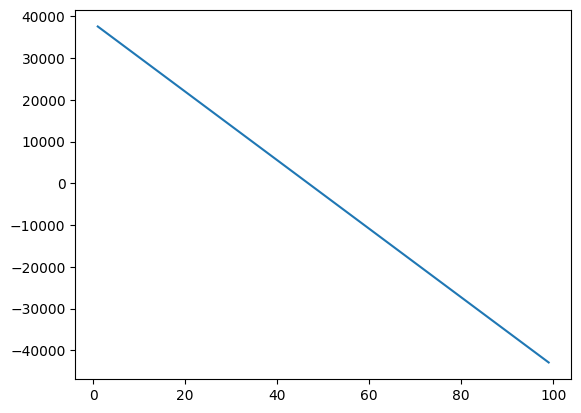

In [119]:
plt.plot(new_input, yhat)
plt.show()

## Decision Making: Determining a Good Model Fit


    What is a good R-squared value?

When comparing models, the model with the higher R-squared value is a better fit for the data.

    What is a good MSE?

When comparing models, the model with the smallest MSE value is a better fit for the data.

Let's take a look at the values for the different models.

Simple Linear Regression: Using Highway-mpg as a Predictor Variable of Price.

    R-squared: 0.49659118843391759
    MSE: 3.16 x10^7

Multiple Linear Regression: Using Horsepower, Curb-weight, Engine-size, and Highway-mpg as Predictor Variables of Price.

    R-squared: 0.80896354913783497
    MSE: 1.2 x10^7

Polynomial Fit: Using Highway-mpg as a Predictor Variable of Price.

    R-squared: 0.6741946663906514
    MSE: 2.05 x 10^7


Comparing these three models, we conclude that the MLR model is the best model to be able to predict price from our dataset.


    MSE: The MSE for the MLR is smaller than the MSE for the Polynomial Fit and SLR.
    R-squared: The R-squared for the MLR is also much larger than for the Polynomial Fit and SLR.



### Model Evaluation and Refinement

In [120]:
#numeric data
df=df._get_numeric_data()
df.head()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
0,3,122,88.6,0.811148,0.890278,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,0,1
1,3,122,88.6,0.811148,0.890278,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,0,1
2,1,122,94.5,0.822681,0.909722,52.4,2823,152,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,0,1
3,2,164,99.8,0.848630,0.919444,54.3,2337,109,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,0,1
4,2,164,99.4,0.848630,0.922222,54.3,2824,136,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,0,1


In [121]:
#libries for plotting
from ipywidgets import interact, interactive, fixed, interact_manual

In [122]:
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))

    ax1 = sns.kdeplot(RedFunction, color="r", label=RedName)
    ax2 = sns.kdeplot(BlueFunction, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel('Price (in dollars)')
    plt.ylabel('Proportion of Cars')
    plt.show()
    plt.close()

In [123]:
def PollyPlot(xtrain, xtest, y_train, y_test, lr,poly_transform):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))

    xmax=max([xtrain.values.max(), xtest.values.max()])

    xmin=min([xtrain.values.min(), xtest.values.min()])

    x=np.arange(xmin, xmax, 0.1)


    plt.plot(xtrain, y_train, 'ro', label='Training Data')
    plt.plot(xtest, y_test, 'go', label='Test Data')
    plt.plot(x, lr.predict(poly_transform.fit_transform(x.reshape(-1, 1))), label='Predicted Function')
    plt.ylim([-10000, 60000])
    plt.ylabel('Price')
    plt.legend()

#### Part 1: Training and Testing

In [124]:
y_data = df['price']

In [125]:
#drop price
x_data=df.drop('price',axis=1)

In [126]:
# split our data into training and testing data using the function train_test_split.
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.10, random_state=1)

print("number of training samples:",x_train.shape[0])
print("number of test samples :", x_test.shape[0])



number of training samples: 180
number of test samples : 21


The test_size parameter sets the proportion of data that is split into the testing set. In the above, the testing set is 10% of the total dataset.

In [128]:
lre=LinearRegression() #Linear Regression object
lre.fit(x_train[['horsepower']], y_train) #fit the model using the feature "horsepower"
lre.score(x_test[['horsepower']], y_test) # R^2 on the test data

0.36358755750788263

In [130]:
#R^2 is much smaller using the test data compared to the training data.
lre.score(x_train[['horsepower']], y_train)

0.6619724197515104

In [127]:
# dataset such that 40% of the data samples will be utilized for testing
x_train1, x_test1, y_train1, y_test1 = train_test_split(x_data, y_data, test_size=0.4, random_state=0)
print('number of training samples:', x_train1.shape[0])
print('number of test samples:', x_test1.shape[0])


number of training samples: 120
number of test samples: 81


In [132]:
lre.fit(x_train1[['horsepower']], y_train1)
lre.score(x_test1[['horsepower']], y_test1)

0.7139364665406973

Cross-Validation Score

In [133]:
from sklearn.model_selection import cross_val_score

In [134]:
Rcross = cross_val_score(lre, x_data[['horsepower']], y_data, cv=4)

In [135]:
#The default scoring is R^2. Each element in the array has the average R^2 value for the fold
Rcross

array([0.7746232 , 0.51716687, 0.74785353, 0.04839605])

In [136]:
#the average and standard deviation of our estimate
print("The mean of the folds are", Rcross.mean(), "and the standard deviation is" , Rcross.std())

The mean of the folds are 0.522009915042119 and the standard deviation is 0.291183944475603


In [138]:
# We can use negative squared error as a score by setting the parameter 'scoring' metric to 'neg_mean_squared_error'.
-1 * cross_val_score(lre,x_data[['horsepower']], y_data,cv=4,scoring='neg_mean_squared_error')

array([20254142.84026702, 43745493.2650517 , 12539630.34014931,
       17561927.72247591])

In [139]:
#average R^2 using two folds, then find the average R^2 for the second fold utilizing the "horsepower" feature
Rc=cross_val_score(lre,x_data[['horsepower']], y_data, cv=2)
Rc.mean()

0.5166761697127429

In [140]:
#function 'cross_val_predict' to predict the output
from sklearn.model_selection import cross_val_predict
yhat = cross_val_predict(lre,x_data[['horsepower']], y_data,cv=4)
yhat[0:5]

array([14141.63807508, 14141.63807508, 20814.29423473, 12745.03562306,
       14762.35027598])

#### Part 2: Overfitting, Underfitting and Model Selection

In [142]:
#Multiple Linear Regression objects and train the model using 'horsepower', 'curb-weight', 'engine-size' and 'highway-mpg' as features.
lr = LinearRegression()
lr.fit(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_train)

LinearRegression()

In [143]:
#Prediction using training data
yhat_train = lr.predict(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
yhat_train[0:5]

array([ 7426.6731551 , 28323.75090803, 14213.38819709,  4052.34146983,
       34500.19124244])

In [144]:
#Prediction using test data
yhat_test = lr.predict(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
yhat_test[0:5]

array([11349.35089149,  5884.11059106, 11208.6928275 ,  6641.07786278,
       15565.79920282])

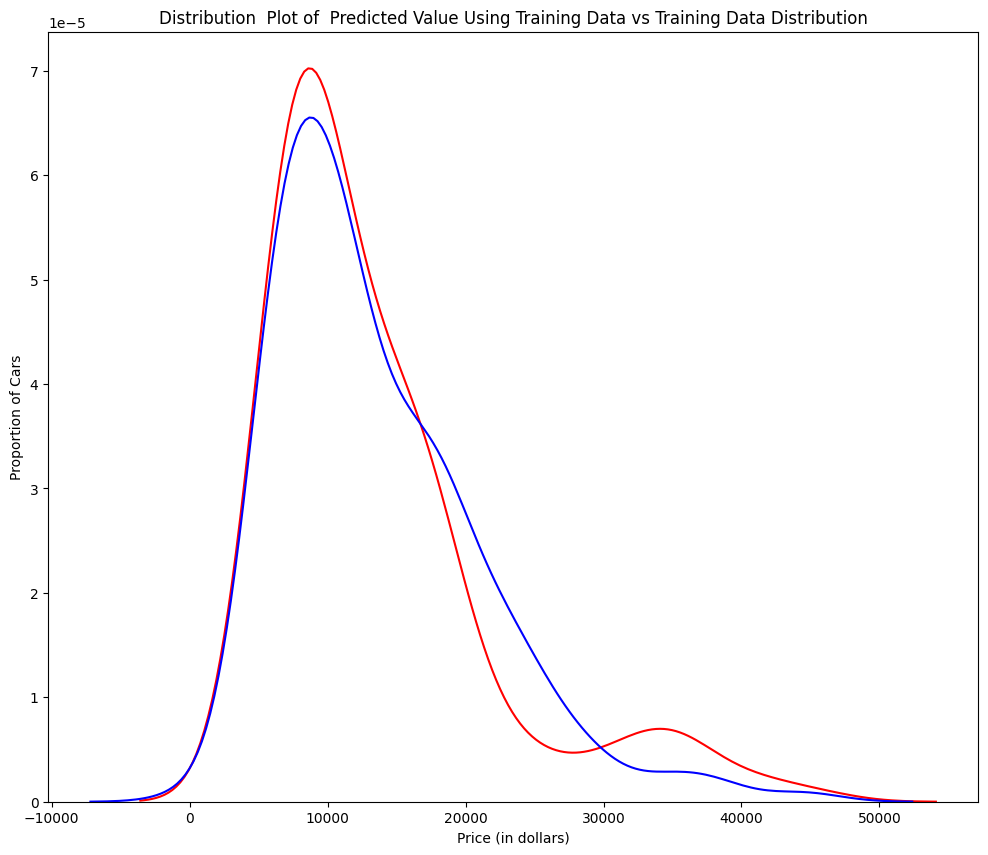

In [145]:
#perform some model evaluation using our training and testing data separately
#Plot of predicted values using the training data compared to the actual values of the training data.
Title = 'Distribution  Plot of  Predicted Value Using Training Data vs Training Data Distribution'
DistributionPlot(y_train, yhat_train, "Actual Values (Train)", "Predicted Values (Train)", Title)

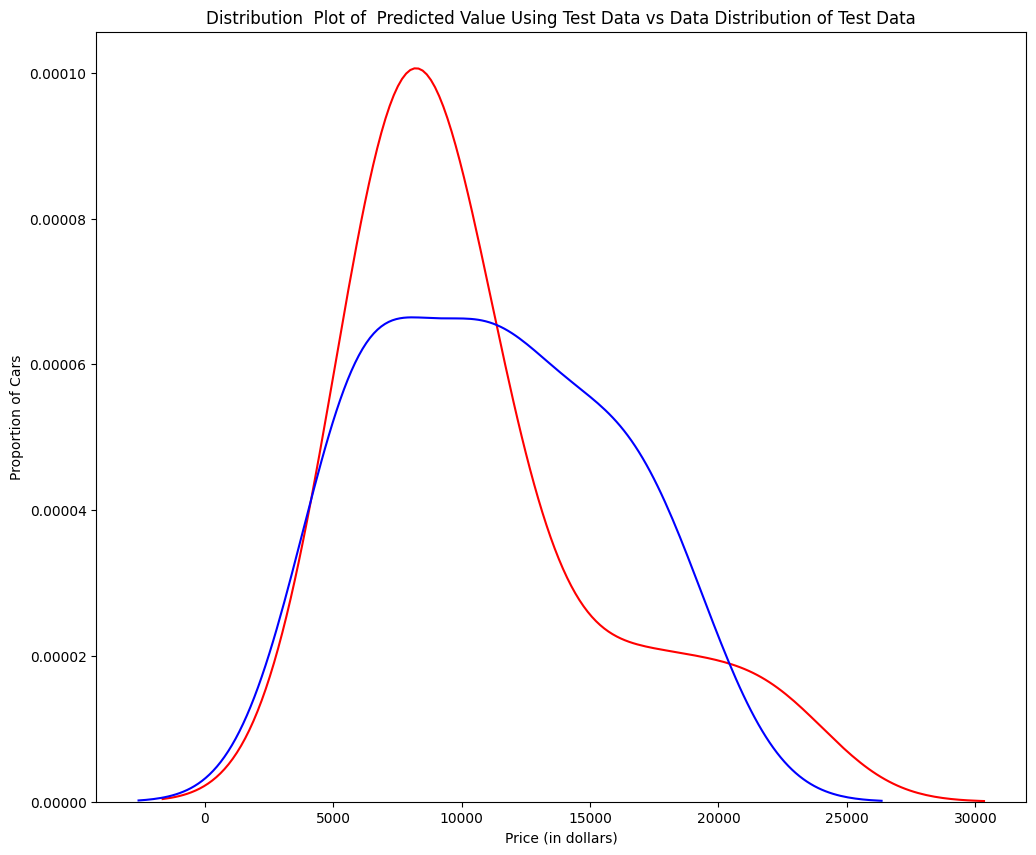

In [146]:
#Plot of predicted value using the test data compared to the actual values of the test data.
Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(y_test,yhat_test,"Actual Values (Test)","Predicted Values (Test)",Title)

Comparing Figure 1 and Figure 2, it is evident that the distribution of the test data in Figure 1 is much better at fitting the data. This difference in Figure 2 is apparent in the range of 5000 to 15,000. This is where the shape of the distribution is extremely different.

In [147]:
#polynomial regression
from sklearn.preprocessing import PolynomialFeatures

In [148]:
#55 percent of the data for training and the rest for testing
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.45, random_state=0)

In [149]:
#a degree 5 polynomial transformation on the feature 'horsepower'
pr = PolynomialFeatures(degree=5)
x_train_pr = pr.fit_transform(x_train[['horsepower']])
x_test_pr = pr.fit_transform(x_test[['horsepower']])
pr

PolynomialFeatures(degree=5)

In [150]:
poly = LinearRegression()
poly.fit(x_train_pr, y_train)

LinearRegression()

In [151]:
yhat = poly.predict(x_test_pr)
yhat[0:5]

array([ 6728.65561887,  7307.98782321, 12213.78770965, 18893.24804015,
       19995.95195136])

In [152]:
#Let's take the first five predicted values and compare it to the actual targets.
print("Predicted values:", yhat[0:4])
print("True values:", y_test[0:4].values)

Predicted values: [ 6728.65561887  7307.98782321 12213.78770965 18893.24804015]
True values: [ 6295. 10698. 13860. 13499.]


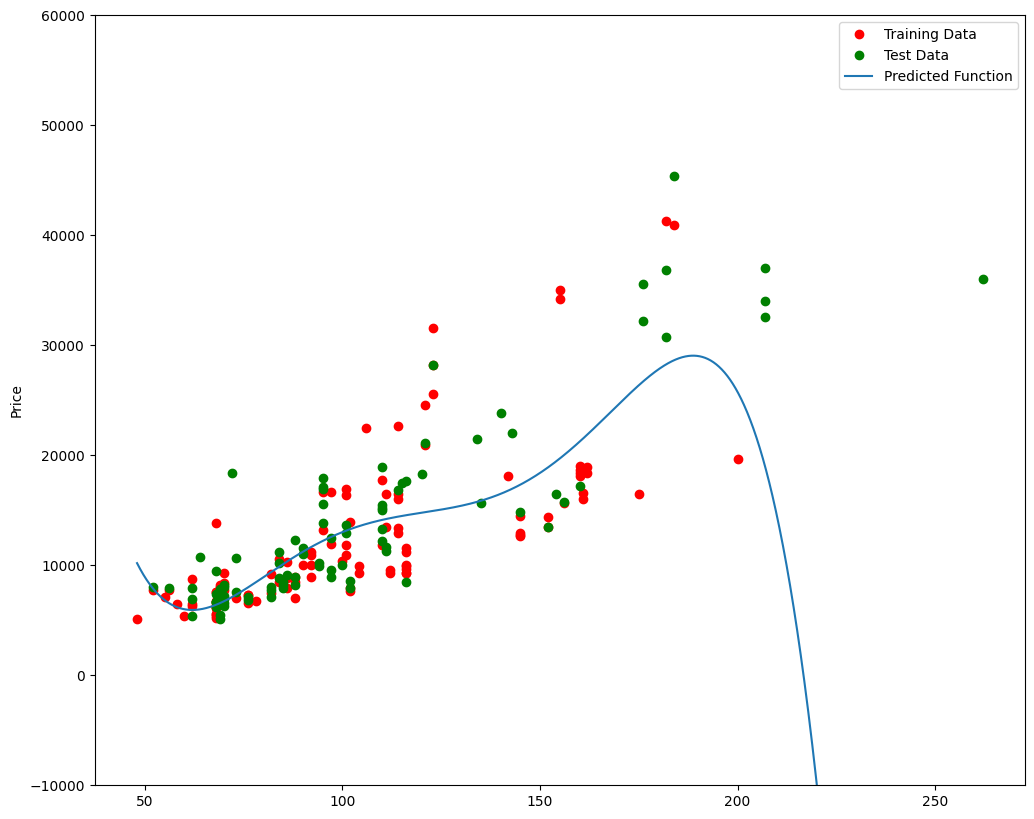

In [153]:
PollyPlot(x_train['horsepower'], x_test['horsepower'], y_train, y_test, poly,pr)

In [155]:
#R^2 of the training data
poly.score(x_train_pr, y_train)

0.5567716902120254

In [156]:
#R^2 of the test data
poly.score(x_test_pr, y_test)

-29.871340302043684

The output belows shows the model has overfitting. A negative R^2 is a sign of overfitting

Text(3, 0.75, 'Maximum R^2 ')

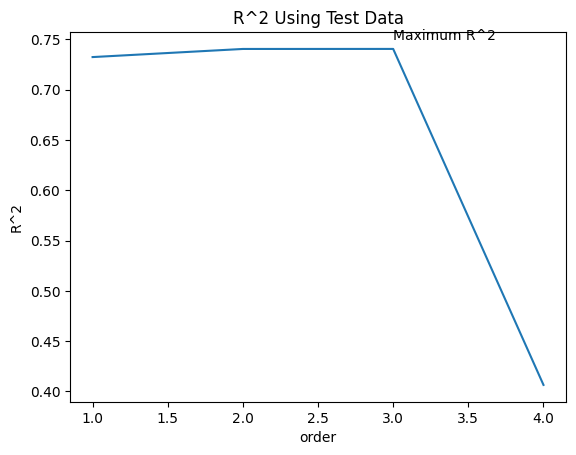

In [157]:
#Let's see how the R^2 changes on the test data for different order polynomials and then plot the results
Rsqu_test = []

order = [1, 2, 3, 4]
for n in order:
    pr = PolynomialFeatures(degree=n)

    x_train_pr = pr.fit_transform(x_train[['horsepower']])

    x_test_pr = pr.fit_transform(x_test[['horsepower']])

    lr.fit(x_train_pr, y_train)

    Rsqu_test.append(lr.score(x_test_pr, y_test))

plt.plot(order, Rsqu_test)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data')
plt.text(3, 0.75, 'Maximum R^2 ')

We see the R^2 gradually increases until an order three polynomial is used. Then, the R^2 dramatically decreases at an order four polynomial.

In [158]:
#experiment with different polynomial orders and different amounts of data
def f(order, test_data):
    x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=test_data, random_state=0)
    pr = PolynomialFeatures(degree=order)
    x_train_pr = pr.fit_transform(x_train[['horsepower']])
    x_test_pr = pr.fit_transform(x_test[['horsepower']])
    poly = LinearRegression()
    poly.fit(x_train_pr,y_train)
    PollyPlot(x_train['horsepower'], x_test['horsepower'], y_train,y_test, poly, pr)

interactive(children=(IntSlider(value=3, description='order', max=6), FloatSlider(value=0.45, description='tes…

<function __main__.f(order, test_data)>

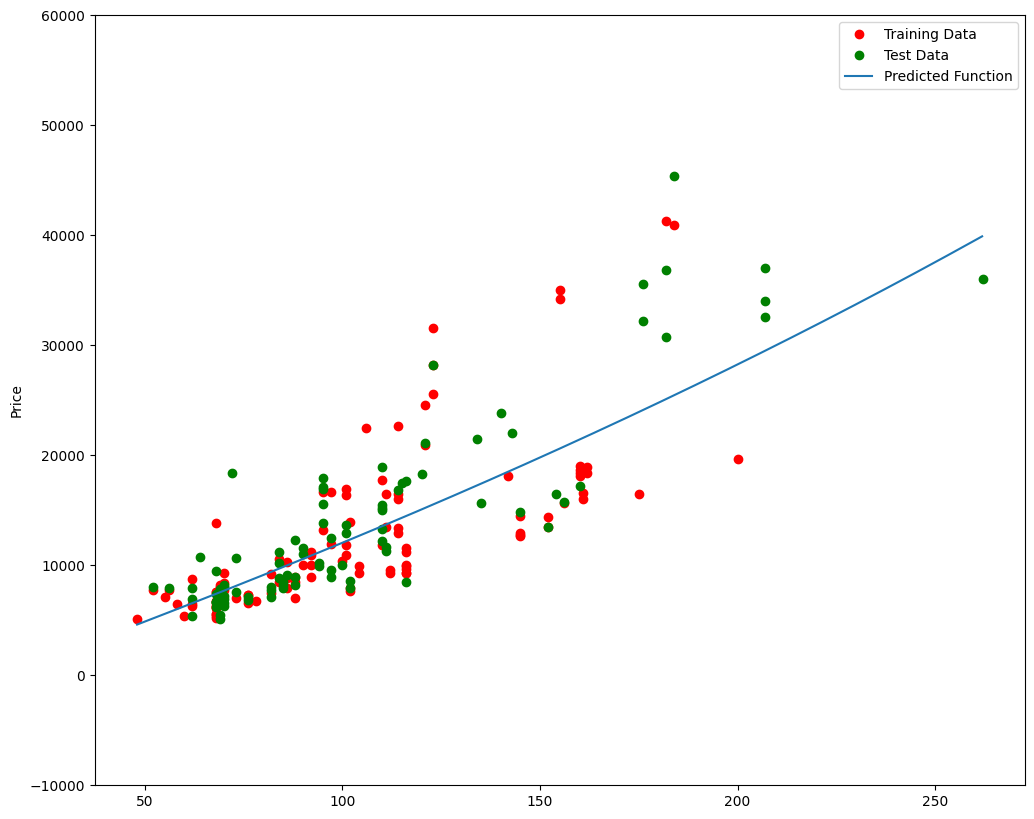

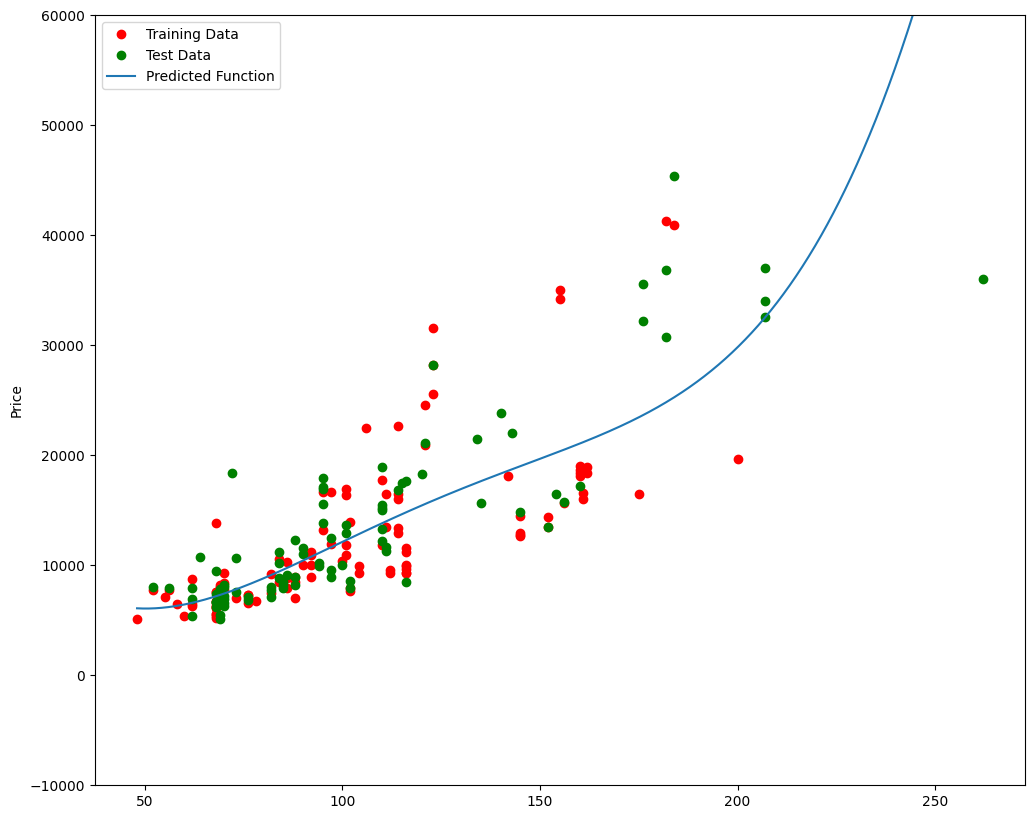

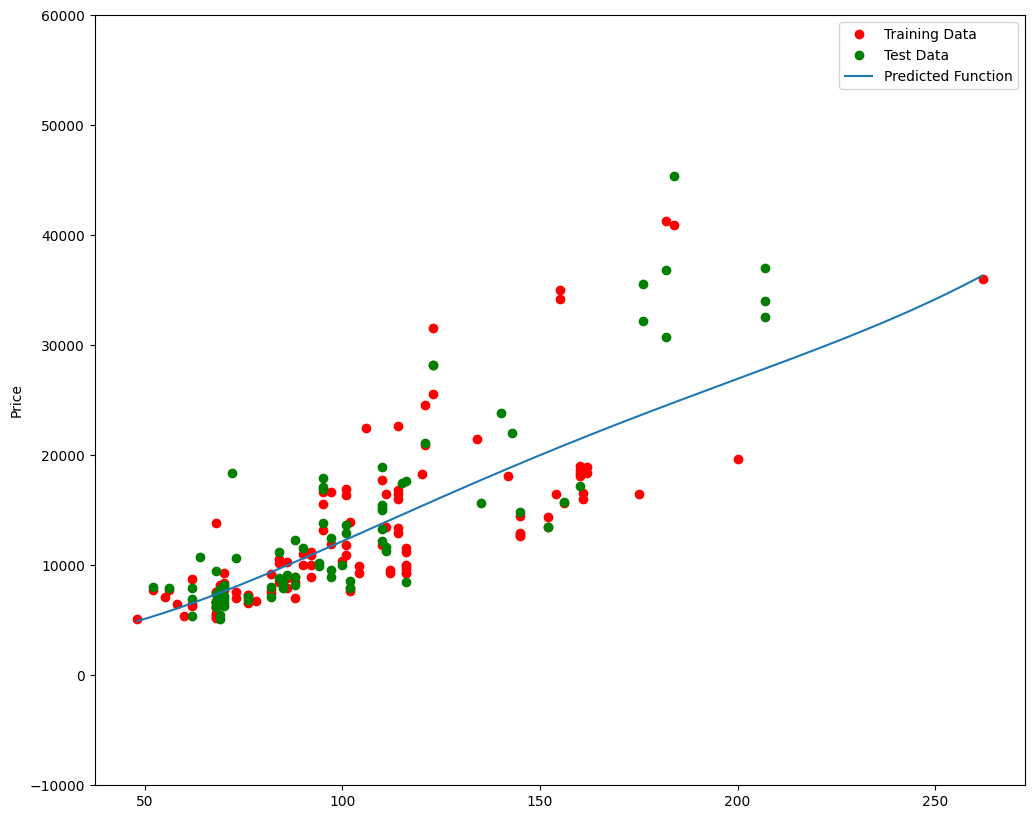

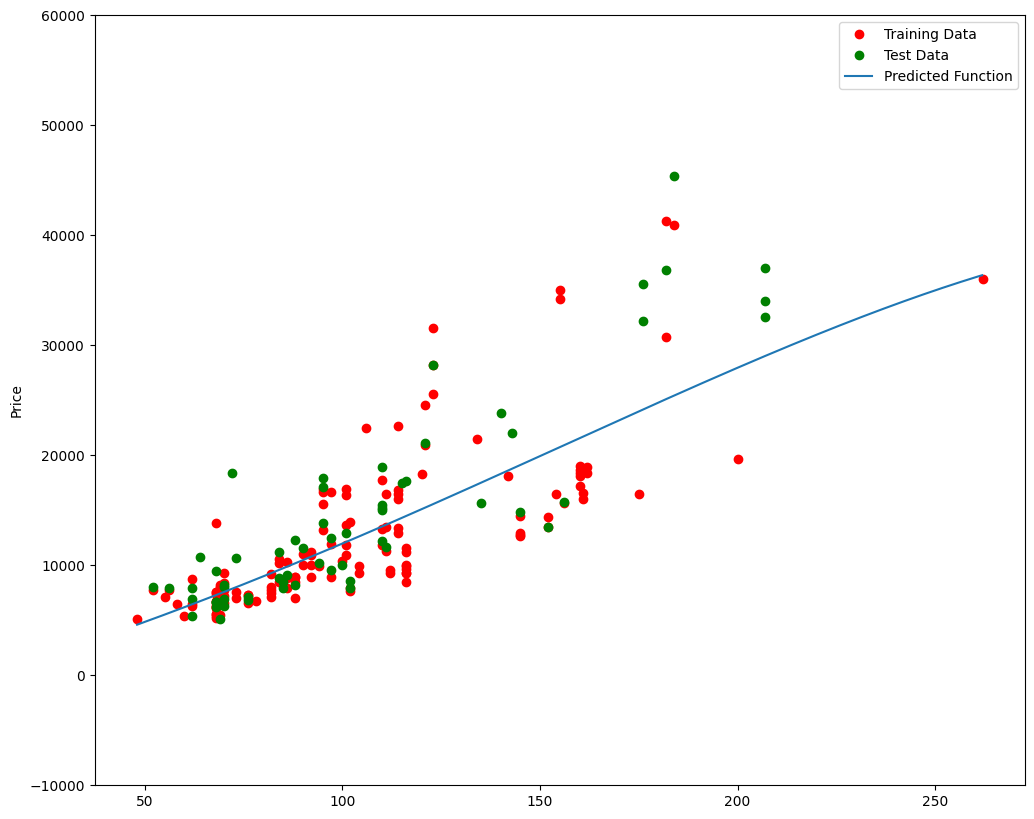

In [159]:
interact(f, order=(0, 6, 1), test_data=(0.05, 0.95, 0.05))

#### Part 3: Ridge Regression

In [160]:
#a degree two polynomial transformation on our data
pr=PolynomialFeatures(degree=2)
x_train_pr=pr.fit_transform(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])
x_test_pr=pr.fit_transform(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])

In [161]:
from sklearn.linear_model import Ridge

In [162]:
#Let's create a Ridge regression object, setting the regularization parameter (alpha) to 1
RigeModel=Ridge(alpha=1)

In [163]:
RigeModel.fit(x_train_pr, y_train)

Ridge(alpha=1)

In [164]:
yhat = RigeModel.predict(x_test_pr)

In [165]:
#Let's compare the first four predicted samples to our test set
print('predicted:', yhat[0:4])
print('test set :', y_test[0:4].values)

predicted: [ 6570.82441941  9636.24891471 20949.92322737 19403.60313256]
test set : [ 6295. 10698. 13860. 13499.]


In [166]:
#We select the value of alpha that minimizes the test error. To do so, we can use a for loop. We have also created a progress bar
#to see how many iterations we have completed so far.
from tqdm import tqdm

Rsqu_test = []
Rsqu_train = []
dummy1 = []
Alpha = 10 * np.array(range(0,1000))
pbar = tqdm(Alpha)

for alpha in pbar:
    RigeModel = Ridge(alpha=alpha)
    RigeModel.fit(x_train_pr, y_train)
    test_score, train_score = RigeModel.score(x_test_pr, y_test), RigeModel.score(x_train_pr, y_train)

    pbar.set_postfix({"Test Score": test_score, "Train Score": train_score})

    Rsqu_test.append(test_score)
    Rsqu_train.append(train_score)

100%|██████████| 1000/1000 [00:10<00:00, 92.10it/s, Test Score=0.564, Train Score=0.859]


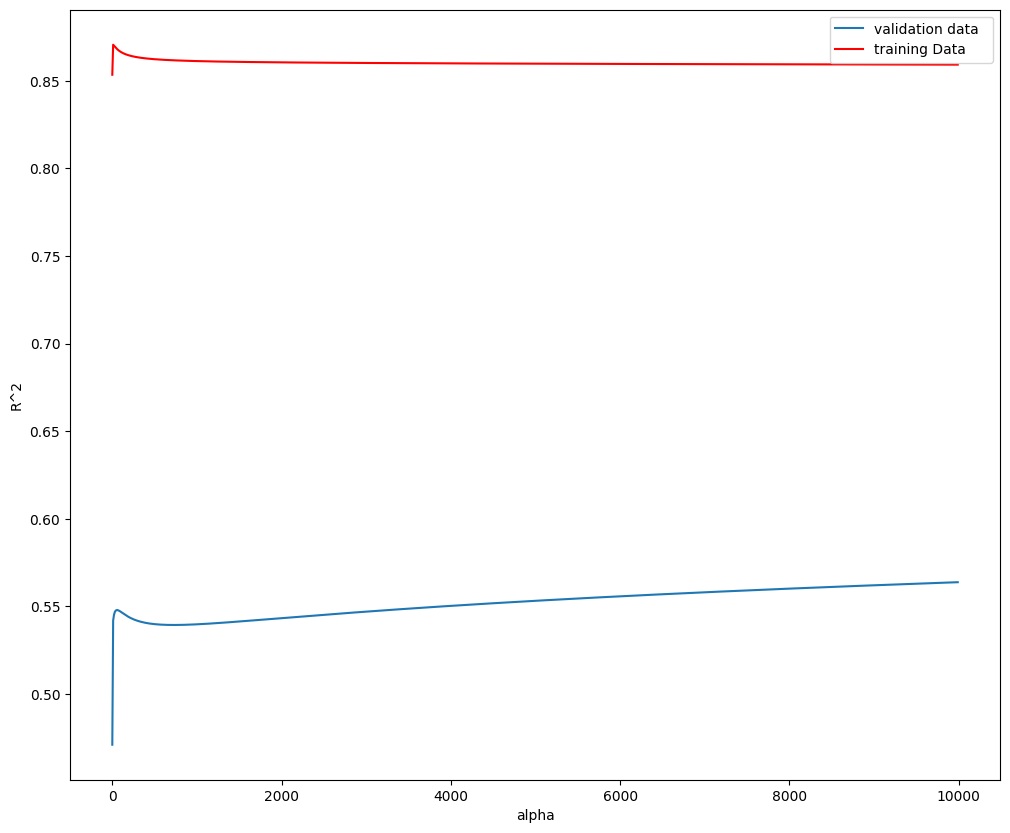

In [167]:
#value of R^2 for different alphas
width = 12
height = 10
plt.figure(figsize=(width, height))

plt.plot(Alpha,Rsqu_test, label='validation data  ')
plt.plot(Alpha,Rsqu_train, 'r', label='training Data ')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend()

The red line represents the R^2 of the training data. As alpha increases the R^2 decreases. Therefore, as alpha increases, the model performs worse on the training data

The blue line represents the R^2 on the validation data. As the value for alpha increases, the R^2 increases and converges at a point.

#### Part 4: Grid Search

The term alpha is a hyperparameter. Sklearn has the class GridSearchCV to make the process of finding the best hyperparameter simpler.

In [168]:
from sklearn.model_selection import GridSearchCV

In [169]:
parameters1= [{'alpha': [0.001,0.1,1, 10, 100, 1000, 10000, 100000, 100000]}]
parameters1

[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000, 100000]}]

In [170]:
RR=Ridge()
RR

Ridge()

In [171]:
#create a ridge grid search object
Grid1 = GridSearchCV(RR, parameters1,cv=4)

In [172]:
#fit the model
Grid1.fit(x_data[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_data)

GridSearchCV(cv=4, estimator=Ridge(),
             param_grid=[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000,
                                    100000]}])

In [173]:
#The object finds the best parameter values on the validation data.
BestRR=Grid1.best_estimator_
BestRR

Ridge(alpha=10000)

In [175]:
# test our model on the test data
BestRR.score(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_test)

0.8411649831036151

In [176]:
#Perform a grid search for the alpha parameter and the normalization parameter, then find the best values of the parameters
parameters2 = [{'alpha':[0.001, 0.1, 1, 10, 100, 1000, 10000, 100000, 1000000]}]

Grid2 = GridSearchCV(Ridge(), parameters2, cv=4)
Grid2.fit(x_data[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_data)
best_alpha = Grid2.best_params_['alpha']
best_ridge_model = Ridge(alpha=best_alpha)
best_ridge_model.fit(x_data[['horsepower','curb-weight','engine-size','highway-mpg']],y_data)


Ridge(alpha=10000)